### Метрики моделей классификации 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import f1_score

In [2]:
iris=load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=7, test_size=0.2)

In [3]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier', KNeighborsClassifier())])
param_grid =[
    {'preprocessing': [MinMaxScaler(), StandardScaler(),RobustScaler()], 
     'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': [1, 2, 3, 4, 8, 12, 16, 20],
     'classifier__p': [1, 2, 3, 4, 6, 8, 10],
     'classifier__weights': ['uniform','distance']}
]
grid = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, iid=True)
grid.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=True),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('preprocessing', MinMaxScaler(copy=True, feature_range=(0, 1))), ('classifier', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=None,
       param_grid=[{'preprocessing': [MinMaxScaler(copy=True, feature_range=(0, 1)), StandardScaler(copy=True, with_mean=True, with_std=True), RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)], 'classifier': [KNeighborsClassifier(algorithm='auto', leaf_siz..., 16, 20], 'classifier__p': [1, 2, 3, 4, 6, 8, 10], 'classifier__weights': ['uniform', 'distance']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [4]:
print("Best parameters:\n{}\n".format(grid.best_params_))
print("Best score: {:.6f}\n".format(grid.best_score_)) 
print("Test score: {:.6f}\n".format(grid.score(X_test, y_test)))
display(pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score"]).T)

Best parameters:
{'classifier': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=3,
           weights='uniform'), 'classifier__n_neighbors': 1, 'classifier__p': 3, 'classifier__weights': 'uniform', 'preprocessing': MinMaxScaler(copy=True, feature_range=(0, 1))}

Best score: 0.975000

Test score: 0.900000



,246,117,210,114,111,108,105,216,102,99,...,278,290,329,314,323,317,320,335,326,332
mean_fit_time,0.000417066,0.000432229,0.00041225,0.000424695,0.000424695,0.00042932,0.000428367,0.000427818,0.000422359,0.000426817,...,0.00128458,0.0012342,0.00111287,0.00110059,0.00132031,0.00118399,0.00149815,0.00110047,0.0010879,0.00109119
std_fit_time,1.19381e-05,2.07683e-05,5.49548e-06,8.30919e-06,2.0397e-05,1.66087e-05,9.75074e-06,1.54554e-05,5.88488e-06,2.2466e-05,...,6.52964e-05,8.71938e-05,5.09581e-05,2.96949e-05,0.00027528,0.000125542,0.000395775,2.26337e-05,1.53079e-05,2.58593e-05
mean_score_time,0.000709748,0.000680232,0.000508666,0.000652623,0.00066421,0.000657272,0.00066576,0.000536251,0.00064826,0.00065515,...,0.000802732,0.000781631,0.000736618,0.000712776,0.000817418,0.000759792,0.000904155,0.000731111,0.000705814,0.000712538
std_score_time,3.34542e-05,5.06082e-05,7.30608e-06,2.25222e-05,3.346e-05,2.25567e-05,2.71159e-05,3.11933e-05,2.12361e-05,2.67806e-05,...,6.57011e-05,4.64647e-05,2.73212e-05,1.85324e-05,0.000119877,4.70241e-05,0.000113891,2.40534e-05,1.71933e-05,1.67224e-05
param_classifier,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...",...,"KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si...","KNeighborsClassifier(algorithm='auto', leaf_si..."
param_classifier__n_neighbors,12,3,12,3,3,3,3,12,3,3,...,16,16,20,20,20,20,20,20,20,20
param_classifier__p,10,8,1,8,6,6,4,2,4,3,...,6,10,8,4,6,4,6,10,8,10
param_classifier__weights,uniform,distance,uniform,uniform,distance,uniform,distance,uniform,uniform,distance,...,uniform,uniform,distance,uniform,distance,distance,uniform,distance,uniform,uniform
param_preprocessing,"MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))","MinMaxScaler(copy=True, feature_range=(0, 1))",...,"RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ...","RobustScaler(copy=True, quantile_range=(25.0, ..."
params,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifier': KNeighborsClassifier(algorithm=...,{'classifi

In [10]:
from sklearn.pipeline import make_pipeline

In [7]:
preproc_1=grid.cv_results_['params'][246]['preprocessing']
preproc_1

MinMaxScaler(copy=True, feature_range=(0, 1))

In [8]:
model_1=grid.cv_results_['params'][246]['classifier']
model_1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=3,
           weights='uniform')

In [16]:
pipe_1=make_pipeline(preproc_1, model_1)
y_pred_1 = pipe_1.predict(X_test)
pipe_1.score(X_train, y_train)

1.0

In [17]:
f1_score(y_test,y_pred_1, average='weighted') 

0.8996190476190475

In [18]:
from sklearn.model_selection import validation_curve

In [21]:
n_range = range(1,20)

train_scores, test_scores = validation_curve(
    pipe_1, X_train, y_train,
    param_name="kneighborsclassifier__n_neighbors", 
    param_range=n_range,
    cv=kfold, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

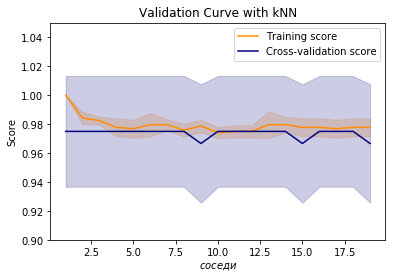

In [22]:
plt.title("Validation Curve with kNN")
plt.xlabel("$соседи$")
plt.ylabel("Score")
plt.ylim(0.9, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

In [12]:
preproc_2, model_2 = map(grid.cv_results_['params'][332].get, ['preprocessing','classifier'])
pipe_2=make_pipeline(preproc_2, model_2)
pipe_2.score(X_train, y_train)

0.7083333333333334

In [23]:
n_range = range(1,20)

train_scores, test_scores = validation_curve(
    pipe_2, X_train, y_train,
    param_name="kneighborsclassifier__n_neighbors", 
    param_range=n_range,
    cv=kfold, 
    scoring="accuracy", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

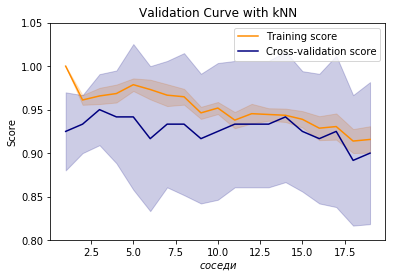

In [20]:
plt.title("Validation Curve with kNN")
plt.xlabel("$соседи$")
plt.ylabel("Score")
plt.ylim(0.8, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()